In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, average_precision_score, roc_curve, precision_recall_curve, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()# 1. Загрузка датасета breast_cancer
 
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size = 0.5)# 2. Разделение на обучающую и тестовую


In [ ]:
scaler = StandardScaler()#  3. Ортонормирование признаков с помощью StandartScaler
X_train = scaler.fit(X_train).transform(X_train)
X_test = scaler.transform(X_test)
#y_train = scaler.fit(y_train).transform()

lr = LogisticRegression().fit(X_train, y_train)# 4. Обучение логистической регрессии
#preds = lr.predict(X_test)# Предсказание тестовой части выборки
preds = lr.predict_proba(X_test)[:,1]

ROC-AUC:  0.9988201497896789
PR-AUC:  0.9992025585314317


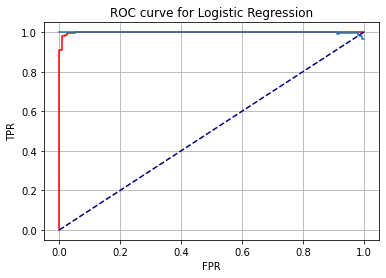

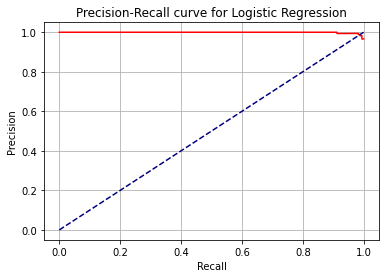

<Figure size 432x288 with 0 Axes>

In [ ]:
roc = roc_auc_score(y_test, preds) # 5. Построение ROC-кривой и Precision-Recall-кривой, вычисление ROC-AUC и PR-AUC
 
pr = average_precision_score(y_test, preds)
print("ROC-AUC: ", roc)
print("PR-AUC: ", pr)
fpr, tpr, threshold = roc_curve(y_test, preds)
plt.plot(fpr,tpr, color='r', label='Log Reg')
plt.title('ROC curve for Logistic Regression')
precision, recall, _=precision_recall_curve(y_test, preds)
plt.step(recall, precision)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.show()
plt.gcf().clear()

Precision, Recall, threshold = precision_recall_curve(y_test, preds)
plt.plot(Recall, Precision, color='r', label='Log Res')
plt.title('Precision-Recall curve for Logistic Regression')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.show()
plt.gcf().clear()


Порог бинаризации вероятностей, который позволяет обеспечить полноту не менее 0,9 :> 0.894125572492449
Матрица ошибок
[[114   0]
 [ 18 153]]


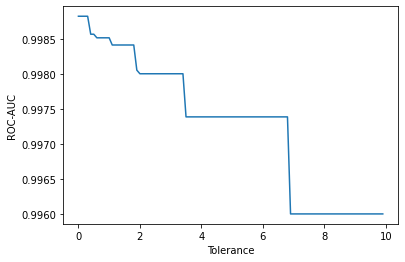

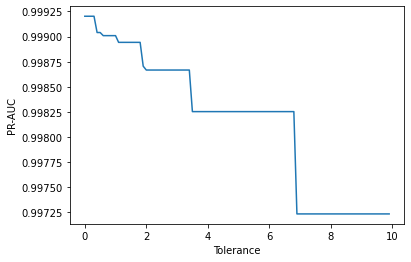

In [ ]:
recall_index = np.where(recall > 0.9) # 6. Порог бинаризации вероятностей, который позволяет обеспечить полноту не менее 0,9.
threshold_value = threshold[recall_index[0][-1]]
print('Порог бинаризации вероятностей, который позволяет обеспечить полноту не менее 0,9 :>', threshold_value)


lr = LogisticRegression().fit(X_train, y_train)# Построение матрицы ошибок для данного порога
preds = lr.predict_proba(X_test)[:,1]
print('Матрица ошибок')
#print(y_test)
#print(preds)
print(confusion_matrix(y_test, preds > threshold_value)); #


# 7. Анализ влияния изменения значения параметра в логистической регрессии на качество классификации
roc_array = [];
pr_array =[];
tolerance = np.arange(0, 10, 0.1) # (from, to, step)
for i in tolerance: #
  lr = LogisticRegression(tol = i).fit(X_train, y_train)
  preds = lr.predict_proba(X_test)[:,1]
  roc = roc_auc_score(y_test, preds)
  pr = average_precision_score(y_test, preds)
  #print("ROC-AUC: ", roc)
  #print("PR-AUC: ", pr)
  roc_array.append(roc)
  pr_array.append(pr)

plt.plot(tolerance, roc_array)
plt.xlabel('Tolerance')
plt.ylabel('ROC-AUC')
plt.show()

plt.plot(tolerance, pr_array)
plt.xlabel('Tolerance')
plt.ylabel('PR-AUC')
plt.show()

